## Week 3 Lab exercises

In this week we will explore the concept of object oreinted programming (OOP) with classes, and the numerical solution of simple non linear ordinary differential equations (ODEs). 

In [38]:
# first we import the libraries we need
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

# The following lines makes the plots appear inline in the notebook
%matplotlib inline

### ACTIVITY 1: 
I have written a class below for a Point object, which encapsulates the idea of a point and things we might want to do to it. 

Here you will write another class object for a Rectangle. You should consider and implement the following points:

1. What is the minimum information that is needed to fully describe a rectangle and its position in space? Assume for simplicity that its edges are aligned with the x and y axes.

2. Implement functions to:

    a. reflect the rectangle in the x and y axes
    
    b. grow the rectangle by an amount in x and y with the bottom left corner fixed
    
    c. grow the rectangle by an amount in x and y with the top right corner fixed
    
    d. plot the rectangle


3. What should be checked here? Can you add some asserts? Do you need to test the functions?

4. Would some of the methods needed make more sense to be implemented in the Points class instead of the Rectangle class? If so go ahead and edit it!

In [51]:
class Book:
    __slots__ = ("title",)
    def __init__(self, title):
        self.title = title


harry_potter = Book("Harry Potter")
harry_potter.title


# harry_potter.author = "J. K. Rowling"

'Harry Potter'

In [49]:
# Points class

class Point :
    """
    Represents a point in a 2D space
    
    attributes: x, y, name
    
    """
    __slots__ = ("x", "y", "name")
    
    # constructor function
    # The double underscores indicate a private method or variable
    # not to be accessed outside the class (in principle)
    def __init__(self, x=0.0, y=0.0, name = ""):
        self.x = x
        self.y = y
        self.name = name
        self.__private_variable = 42
        
    def __add__(self, other) :
        new_point = Point(self.x+other.x, self.y+other.y)
        return new_point
    
    def print_point(self) :
        print("Point ", self.name, "is", self.x, self.y)
        
    # Note that we don't use self here so don't need to pass it in
    # (This is a static function - it does not require an instance of the class)
    def calculate_distance_between_two_points(A, B) :
        return np.sqrt((A.x - B.x)**2.0 + (A.y - B.y)**2.0)
    
    def move_point(self,dx,dy) :
        self.x += dx
        self.y += dy
        
    def plot_point(self, ax) :
        ax.plot(self.x, self.y, 'o', label=self.name)
        
    def update_name(self, new_name) :
        self.name = new_name

    def __repr__(self):
        return "(" + str(self.x) + ", " + str(self.y) + ")"
        
        
# Some examples of using the Points class
first_point = Point(1.0,2.0,"P")
first_point.print_point()

first_point.x = 1.0

second_point = Point(3.0,5.5,"Q")
second_point.move_point(1.0, 2.0)
second_point.print_point()

third_point = first_point + second_point
third_point.update_name("R")
third_point.print_point()

# Use the static function
distance = Point.calculate_distance_between_two_points(first_point,second_point)
print("Distance is ", distance)

plt.plot()
plt.grid()
plt.xlabel("x position")
plt.ylabel("y position")
ax = plt.gcf().gca()
first_point.plot_point(ax)
second_point.plot_point(ax)
third_point.plot_point(ax)
plt.legend()

# Try to access the private variable, even though you shouldn't
#print(first_point.__private_variable) # This won't work - try uncommenting it
print(first_point._Point__private_variable) # This will

# Can get info on the new class - uncomment to see this
# Point?
# help(Point)

first_point

AttributeError: 'Point' object has no attribute '_Point__private_variable'

In [31]:
class ReadOnlyClass(type):
    def __setattr__(self, name, value):
        raise ValueError(name)
    
class A(object, metaclass=ReadOnlyClass):
    foo = "don't change me"

a = A()
a.foo = "asd"
print(a.foo)

asd


In [46]:
# Rectangle class

# UPDATE ME!

# I have written a class below for a Point object, which encapsulates the idea of a point and things we might want to do to it.

# Here you will write another class object for a Rectangle. You should consider and implement the following points:

#     What is the minimum information that is needed to fully describe a rectangle and its position in space? Assume for simplicity that its edges are aligned with the x and y axes.

#     Implement functions to:

#     a. reflect the rectangle in the x and y axes

#     b. grow the rectangle by an amount in x and y with the bottom left corner fixed

#     c. grow the rectangle by an amount in x and y with the top right corner fixed

#     d. plot the rectangle

#     What should be checked here? Can you add some asserts? Do you need to test the functions?

#     Would some of the methods needed make more sense to be implemented in the Points class instead of the Rectangle class? If so go ahead and edit it!


class Rectangle :
    """
    Represents a rectangle in a 2D space

    The edges are aligned with the x and y axes.
    
    attributes: bottom_left_corner, upper_right_corner, name
    
    """
    
    # constructor function
    # The double underscores indicate a private method or variable
    # not to be accessed outside the class (in principle)
    # TODO: Should I always declare default values even when users have to specify them?
    # Default: unit square ((0, 0), (1, 1))
    # Allowing zero area.
    def __init__(self, 
                 bottom_left_corner=Point(), 
                 upper_right_corner=Point(), 
                 name = ""):
        # Break if the user passes the corners in the wrong order
        self._bottom_left_corner = deepcopy(bottom_left_corner)
        self._upper_right_corner = deepcopy(upper_right_corner)
        self.name = name
        self.__check_rectangle()

    def __check_rectangle(self):
        assert (self.bottom_left_corner.x < self.upper_right_corner.x), (
            "The bottom left corner " + str(self.bottom_left_corner) + 
            " is not on the left of " + str(self.upper_right_corner) + "."
        )
        assert (self.bottom_left_corner.y < self.upper_right_corner.y), (
            "The bottom left corner " + str(self.bottom_left_corner) + 
            " is not below the " + str(self.upper_right_corner) + "."
        )

    # https://docs.python.org/3/library/functions.html#property
    # getter
    @property
    def bottom_left_corner(self):
        return self._bottom_left_corner

    @property
    def upper_right_corner(self):
        return self._upper_right_corner

    # setter
    @bottom_left_corner.setter
    def bottom_left_corner(self, bottom_left_corner):
        self._bottom_left_corner = bottom_left_corner
        self.__check_rectangle()

    @upper_right_corner.setter
    def upper_right_corner(self, upper_right_corner):
        self._upper_right_corner = upper_right_corner
        self.__check_rectangle()

        
    def print_rectangle(self) :
        print("Rectangle ", self.name, " is ", self.x, ", ", self.y, 
              sep="")

    # def reflect_over_x_axis(self):
        

    # def reflect_over_y_axis(self):
        
    # Note that we don't use self here so don't need to pass it in
    # (This is a static function - it does not require an instance of the class)
    def calculate_distance_between_two_points(A, B) :
        return np.sqrt((A.x - B.x)**2.0 + (A.y - B.y)**2.0)
    
    def move_point(self,dx,dy) :
        self.x += dx
        self.y += dy
        
    def plot_point(self, ax) :
        ax.plot(self.x, self.y, 'o', label=self.name)
        
    def update_name(self, new_name) :
        self.name = new_name

    def __repr__(self):
        return "(" + str(self.bottom_left_corner) + ", " + str(self.upper_right_corner) + ")"
        
        
# Some examples of using the Points class
first_point = Point(1.0,2.0,"P")
first_point.print_point()

second_point = Point(3.0,5.5,"Q")
second_point.move_point(1.0, 2.0)
second_point.print_point()

third_point = first_point + second_point
third_point.update_name("R")
third_point.print_point()

good_rec = Rectangle(first_point, second_point, "Good Rec")
print(good_rec)

# first_point = Point(10.0,20.0,"P")
first_point.x = 10.0
print(good_rec)

good_rec.bottom_left_corner = first_point


good_rec._bottom_left_corner = first_point
print(good_rec)


# bad_rec = Rectangle(second_point, first_point, "Bad Rec") # This should throws an error.
# print(bad_rec)


# Use the static function
distance = Point.calculate_distance_between_two_points(first_point,second_point)
print("Distance is ", distance)

plt.plot()
plt.grid()
plt.xlabel("x position")
plt.ylabel("y position")
ax = plt.gcf().gca()
first_point.plot_point(ax)
second_point.plot_point(ax)
third_point.plot_point(ax)
plt.legend()

# Try to access the private variable, even though you shouldn't
#print(first_point.__private_variable) # This won't work - try uncommenting it
print(first_point._Point__private_variable) # This will

# Can get info on the new class - uncomment to see this
# Point?


Point  P is 1.0 2.0
Point  Q is 4.0 7.5
Point  R is 5.0 9.5
((1.0, 2.0), (4.0, 7.5))
((1.0, 2.0), (4.0, 7.5))


AssertionError: The bottom left corner (10.0, 2.0) is not on the left of (4.0, 7.5).

### ACTIVITY 2: 

Now create a Square class that has the same functionality as the rectangle class, but that in addition has the ability to calculate its own area. You are not allowed to modify the Rectangle class.

_HINT: Do you really need to write a whole new function from scratch? What about inheritance?_


In [4]:
# Square class

# UPDATE ME

### ACTIVITY 3:

Now we wil consider a simpled coupled ODEs: the Lotka-Volterra equations describe predator-prey relations, where some species $x$ (e.g. a fox) eats another species $y$ (e.g. rabbits), and each population grows by breeding at a rate proportional to its number. The resulting evolution is described by the following first order, autonomous, non linear, coupled system of ordinary differential equations:

$\frac{dx}{dt} = ax - bxy$

$\frac{dy}{dt} = -cy + dxy$

What parts or features of the differential equation tell us that it is:
1. First order
2. Autonomous
3. Non linear
4. Coupled 

?

Answers: ... UPDATE ME!

In [21]:
# Exercise 4 suggestion: 1st do it in Excel
# (a) Calculate the repayment amount
# (b) Calculate APR

### ACTIVITY 4:

The following code solves the Logistic Equation 

$\frac{dy}{dt} = y (1 - y)$

Using a simple explicit integration and the scipy function solve_ivp() which used Runge-Kutta 4th/5th order time integration. Copy it and update it to solve instead the Lotka-Volterra equations. 

Note the following:

1. Why do I substract delta_t when calculating the vector of t_solution points?
2. the solve_ivp method uses the labels t and y for the independent and dependent variables. The y value is assumed to be a vector, allowing you to solve for multiple dependent variables at once, e.g. you can make it np.array([x,y])

/var/folders/93/vbctx38s679csjc40t_hlf5c0000gn/T/ipykernel_86584/2937276196.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_solution[0] = y0


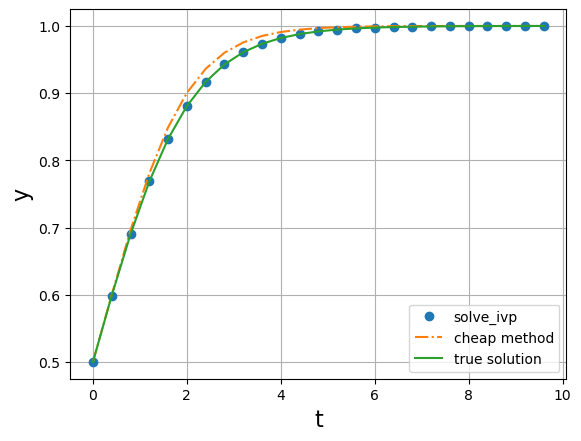

In [5]:
# Solve the 1d logistic equation from class
from scipy.integrate import solve_ivp

# Note that the function has to take t as the first argument and y as the second
def calculate_logistic_dydt(t, y):
    """Returns the gradient dx/dt for the logistic equation"""
    dydt = y*(1 - y)
    return dydt

max_time = 10.0
N_time_steps = 25
delta_t = max_time / N_time_steps
t_solution = np.linspace(0.0, max_time-delta_t, N_time_steps) # values of independent variable 
y0 = np.array([0.5]) # an initial condition, y(0) = y0, note it needs to be an array

solution = solve_ivp(calculate_logistic_dydt, [0,max_time], y0,
                        method='RK45', t_eval=t_solution)
 
plt.grid()
plt.xlabel("t", fontsize=16)
plt.ylabel("y", fontsize=16) 
plt.plot(solution.t, solution.y[0], 'o', label="solve_ivp")

# Now do it the "cheap" way 
# increase the number of steps to see how the solution changes
y_solution = np.zeros_like(t_solution)
y_solution[0] = y0
for itime, time in enumerate(t_solution) :
    if itime > 0 :
        dydt = calculate_logistic_dydt(time, y_solution[itime-1])
        y_solution[itime] = y_solution[itime-1] + dydt * delta_t
    
plt.plot(t_solution, y_solution, '-.',label="cheap method")

# Now plot the true solution
A = 1.0/y0 - 1.0
y_true = 1.0 / (1.0 + A * np.exp(-t_solution))
plt.plot(t_solution, y_true, '-', label="true solution")
plt.legend(loc='best');

In [6]:
# Your solution here for the predator-prey equations !

# UPDATE ME!

### ACTIVITY 5:

Find the equilibrium value of rabbits and foxes such that you do not get oscillations.

_HINT: You can do this by trying different initial values of the rabbits and foxes, but it may help to also plot the solutions of x versus y for different values of the initial conditions and identify if there is a trend_

In [7]:
# Plot some solutions of x versus y

# HINT: plt.plot(solution.y[0], solution.y[1], '--', label="x0, y0 = ??")

### ACTIVITY 6:

If you double the resolution in the simple integrator, what happens to the error in the solution compared to solve_ivp? Why? How could you improve this behaviour?

In [8]:
# Compare the errors here

# HINT: plt.plot(solution.t, solution.y[0] - y_solution, '--', label="error versus solve_ivp, dt = ??")

### ACTIVITY 7:

The predator - prey equations have been cast above in a _functional coding_ style. Can you imagine a way to cast them in a more OOP way?

_HINT: There are several ways this could be done, but consider writing an Ecosystem class - what would be the attributes and methods that would live in such a class?_

OPTIONAL: Implement it!

A: UPDATE ME!

In [9]:
# Implementation of the Ecosystem class (OPTIONAL)
